In [40]:
import pandas as pd

pos = pd.read_csv("/bigtemp/rm5tx/nlp_project/adjacent_data/adjacent_2016-06_rat_0.2_tot_5_positive.csv")
neg = pd.read_csv("/bigtemp/rm5tx/nlp_project/adjacent_data/adjacent_2016-06_rat_0.2_tot_5_negative.csv")
pc = pos['author'].value_counts().rename("pos")
nc = neg['author'].value_counts().rename("neg")
merge = pd.concat([pc, nc], axis=1).dropna()
print(pos['data'], merge)


0        0 3 midlaner says I dont need a silver to ward...
1        That s why I play Sion One of the most rewardi...
2        Pretty sure we would still just go by North Am...
3        Actually similarly I thought adultery was just...
4        I thought lol that car says porn on the dash t...
                               ...                        
55451    They don t recognize the priority of it we nee...
55452    I would not rate this iteration of TSM above S...
55453                     Oprah Winfrey and Gaburey Sidibe
55454    I work with my uncle on his ranch There are co...
55455    Tagging your comment for if when TSM faces RNG...
Name: data, Length: 55456, dtype: object Empty DataFrame
Columns: [pos, neg]
Index: []


In [3]:
import pandas as pd
# import re
import os
# import logging
import sys


def preprocess_dataset(day,nrow=-1):
    if nrow==-1:
        neg_data = pd.read_csv("/bigtemp/rm5tx/nlp_project/"+day+"_for_model_2_tuned.csv")
    else:
        neg_data = pd.read_csv("/bigtemp/rm5tx/nlp_project/"+day+"_for_model_2_tuned.csv",nrows=nrow)
    # We want a unify col name for when we concat pos and neg data
    #neg_data.rename(columns={"body":"data"}, inplace=True)
    print("removing irrelevant data")
    neg_data = neg_data.dropna(subset=['author', 'data'])
    neg_data = neg_data[neg_data.author!='[deleted]']
    neg_data = neg_data[neg_data.author!='AutoModerator']

    return neg_data


day = "2016-06" #first parameter for notebook, for python code it will be sys.argv[1]
rat = 0 # second paramter for notebook, for python code it will be sys.argv[2]
tot = 0 # second paramter for notebook, for python code it will be sys.argv[2]

dummy_df = preprocess_dataset(day)

pos_counts = dummy_df['author'][dummy_df['label']==1.0].value_counts().rename("pos")
neg_counts = dummy_df['author'][dummy_df['label']==0.0].value_counts().rename("neg")
counts = pd.concat([pos_counts, neg_counts], axis=1)
counts['ratio'] = counts.pos / (counts.neg + counts.pos)
counts['total'] = counts.pos + counts.neg
counts = counts.dropna()

print("Total Comments from 'toxic users'", counts['total'][(counts['ratio'] >= rat) & (counts['total'] >= tot)].sum())
toxic_users = counts[(counts['ratio'] >= rat) & (counts['total'] >= tot)].index


pos_df = dummy_df[dummy_df.author.isin(toxic_users)]
neg_df = dummy_df[~dummy_df.author.isin(toxic_users)]



removing irrelevant data
Total Comments from 'toxic users' 10612581.0


In [4]:
pos_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_flair_css_class,edited,id,controversiality,stickied,distinguished,subreddit,...,score,data,link_id,author_flair_text,gilded,created_utc,parent_id,author,ups,label
0,0,0,0.0,broncos,False,d3r38da,0.0,False,NaN,nfl,...,13.0,Definitely the Packers Without Tolzien they re...,t3_4lx5wk,Broncos,0.0,1.464739e+09,t3_4lx5wk,ktsmyth,13.0,0.0
2,2,2,2.0,steelers,False,d3r38dg,0.0,False,NaN,nfl,...,10.0,Fair enough I apologize,t3_4lx59c,Steelers,0.0,1.464739e+09,t1_d3r2qy4,just_here_to_vote,10.0,0.0
7,7,7,7.0,male,False,d3r38dp,0.0,False,NaN,AskWomen,...,1.0,please see this similar post that was posted 1...,t3_4ly4np,♂ Mod,0.0,1.464739e+09,t3_4ly4np,dsklerm,1.0,1.0
12,12,12,12.0,NaN,False,d3r38dx,0.0,False,NaN,pics,...,2.0,for some reason was not expecting the pilot sl...,t3_4lx3nj,NaN,0.0,1.464739e+09,t3_4lx3nj,PsychMarketing,2.0,0.0
13,13,13,13.0,gen2,False,d3r38dz,0.0,False,NaN,pokemontrades,...,1.0,FeelsBadMan,t3_4lycbn,3711-9581-6298 || Jenpai (αS),0.0,1.464739e+09,t1_d3r36gm,jen_pai,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22922561,119616,119638,24117550.0,NaN,False,d4up6gu,0.0,False,NaN,Overwatch,...,1.0,that is hilarious I want this so bad now,t3_4ql8n6,NaN,0.0,1.467331e+09,t1_d4u78xp,PotatoBomb69,1.0,NaN
22922562,119617,119639,24117551.0,florida,False,d4up6gx,0.0,False,NaN,The_Donald,...,4.0,Bullet for my Infidel,t3_4qopud,FL,0.0,1.467331e+09,t1_d4uos4h,MAGA_LO_DON,4.0,NaN
22922565,119620,119642,24117554.0,C01 R13,1467348449,d4up6h1,0.0,False,NaN,Overwatch,...,-11.0,Maybe for you Not everyone plays on PC though ...,t3_4qmav5,Mercy,0.0,1.467331e+09,t1_d4uozim,kilgore_trout87,-11.0,NaN
22922571,119626,119648,24117560.0,NaN,False,d4up6he,0.0,False,NaN,news,...,0.0,Tax already has a definition a compulsory cont...,t3_4qm0ac,NaN,0.0,1.467331e+09,t1_d4up2gs,funky_duck,0.0,NaN


In [5]:
neg_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author_flair_css_class,edited,id,controversiality,stickied,distinguished,subreddit,...,score,data,link_id,author_flair_text,gilded,created_utc,parent_id,author,ups,label
3,3,3,3.0,C04 R09,False,d3r38dj,0.0,False,NaN,Overwatch,...,2.0,Doesn t need a theme it s Overwatch,t3_4lyc5l,Pixel Reinhardt,0.0,1.464739e+09,t3_4lyc5l,BlueMelonz,2.0,0.0
4,4,4,4.0,NaN,False,d3r38dm,0.0,False,NaN,LifeProTips,...,3.0,And a tennis ball And string,t3_4lv0kq,NaN,0.0,1.464739e+09,t1_d3qwc5m,clydethechicken,3.0,0.0
5,5,5,5.0,C01 R16,False,d3r38dn,0.0,False,NaN,Overwatch,...,3.0,Beautiful,t3_4lo1oe,Roadhog,0.0,1.464739e+09,t1_d3paxwh,sirthinkstoomuch,3.0,0.0
9,9,9,9.0,maryland,False,d3r38ds,0.0,False,NaN,The_Donald,...,2.0,I NEED ONE NOW,t3_4lycm7,MD,0.0,1.464739e+09,t3_4lycm7,AllTrumpDoesIsWin,2.0,0.0
10,10,10,10.0,NaN,False,d3r38dt,0.0,False,NaN,politics,...,3.0,I m very glad I read that The first well thoug...,t3_4lxbri,NaN,0.0,1.464739e+09,t3_4lxbri,wheresthecheese,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22922564,119619,119641,24117553.0,NaN,False,d4up6gz,0.0,False,NaN,AskReddit,...,1.0,Well I stand corrected But actually it s Orent...,t3_4qmt18,NaN,0.0,1.467331e+09,t1_d4uoqzo,FredLives,1.0,NaN
22922566,119621,119643,24117555.0,NaN,False,d4up6h3,0.0,False,NaN,Overwatch,...,17.0,Check OPs history He is just constantly compla...,t3_4qo2t1,NaN,0.0,1.467331e+09,t3_4qo2t1,Ward_Craft,17.0,NaN
22922567,119622,119644,24117556.0,NaN,False,d4up6h4,0.0,False,NaN,funny,...,0.0,The guy below you has gold and more upvotes so...,t3_4qnmfg,NaN,0.0,1.467331e+09,t1_d4unqau,Lurking4Justice,0.0,NaN
22922568,119623,119645,24117557.0,NaN,False,d4up6h7,0.0,False,NaN,AskReddit,...,2.0,ITT people not knowing the difference between ...,t3_4qlnnl,NaN,0.0,1.467331e+09,t3_4qlnnl,FecalLord,2.0,NaN


In [59]:
import matplotlib.pyplot as plt
i = 0
def stuff(counts):
    global i
    print(stats.describe(counts['pos']))
    # plt.hist(counts['pos'])
    plt.hist(counts['pos'], bins=50, range=[0,50])
    # plt.hist(counts['pos'], bins=21, range=[10,220])
    # plt.axvline(counts['pos'].mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.text(0, 0, 'Mean: {:.2f}'.format(counts['pos'].mean()))
    plt.title("Base Classifier - Toxic Comments by User")
    plt.savefig(str(i) + ".png")
    i += 1
    plt.show()
    print(stats.describe(counts['total']))
    # plt.hist(counts['total'])
    plt.hist(counts['total'], bins=50, range=[0,50])
    # plt.hist(counts['total'], bins=22, range=[0,220])
    # plt.axvline(counts['total'].mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.text(0, 0, 'Mean: {:.2f}'.format(counts['total'].mean()))
    plt.title("Base Classifier - Total Comments by User")
    plt.savefig(str(i) + ".png")
    i += 1
    plt.show()
    print(stats.describe(counts['ratio']))
    # plt.hist(counts['ratio'])
    plt.hist(counts['ratio'], bins=20, range=[0, 0.5])
    # plt.hist(counts['ratio'], bins=20, range=[0, 0.6])
    # plt.axvline(counts['ratio'].mean(), color='k', linestyle='dashed', linewidth=1)
    # plt.text(counts[0, 0, 'Mean: {:.2f}'.format(counts['ratio'].mean()))
    plt.title("Base Classifier - Toxic Comments by User (%)")
    plt.savefig(str(i) + ".png")
    i += 1
    plt.show()



In [53]:
from scipy import stats


DescribeResult(nobs=151009, minmax=(1.0, 212.0), mean=1.6143408671006363, variance=2.8820193858484764, skewness=18.71885635398521, kurtosis=1643.1511984331719)


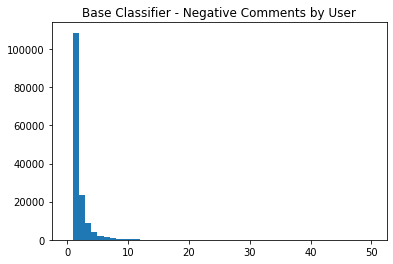

DescribeResult(nobs=151009, minmax=(2.0, 15621.0), mean=70.27780463416087, variance=16322.235237986011, skewness=17.754963285170845, kurtosis=1529.3573475684416)


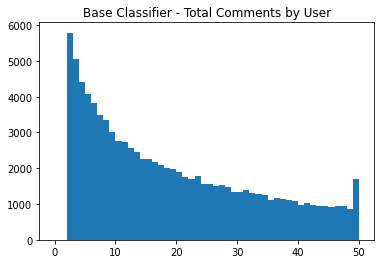

DescribeResult(nobs=151009, minmax=(0.001483679525222552, 0.75), mean=0.08553878884509022, variance=0.012930920918846598, skewness=2.3414681861016886, kurtosis=5.205572622888193)


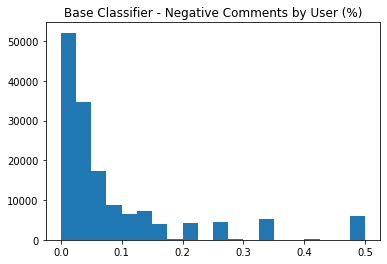

2pos
DescribeResult(nobs=42436, minmax=(2.0, 212.0), mean=3.186139127156188, variance=6.819622647215583, skewness=16.310093297513813, kurtosis=1001.6463270028171)


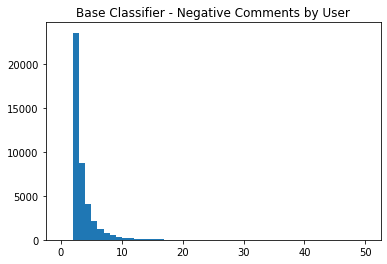

DescribeResult(nobs=42436, minmax=(3.0, 15621.0), mean=161.6157272127439, variance=42098.381446062405, skewness=13.840100658677274, kurtosis=790.81466715637)


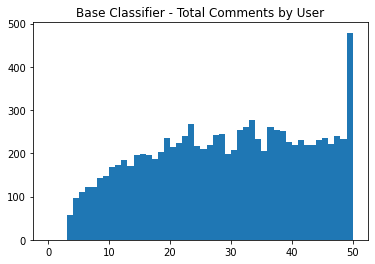

DescribeResult(nobs=42436, minmax=(0.0026666666666666666, 0.75), mean=0.04135444880028236, variance=0.003152802916243502, skewness=5.258672619993316, kurtosis=39.08095305724212)


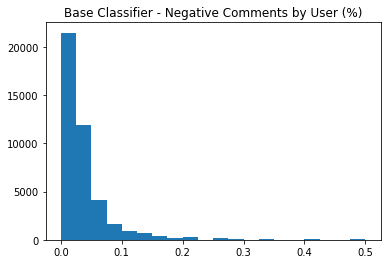

23/2
DescribeResult(nobs=15807, minmax=(1.0, 4.0), mean=1.0472575441260201, variance=0.0523661024002191, skewness=5.248038006493948, kurtosis=30.86977839064209)


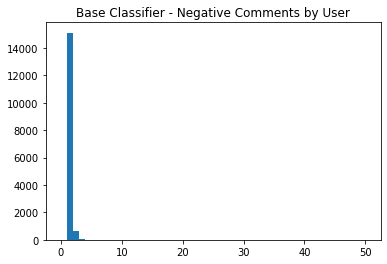

DescribeResult(nobs=15807, minmax=(2.0, 15.0), mean=3.0488391219080153, variance=1.2839615461145775, skewness=2.305994503372594, kurtosis=11.793925885621245)


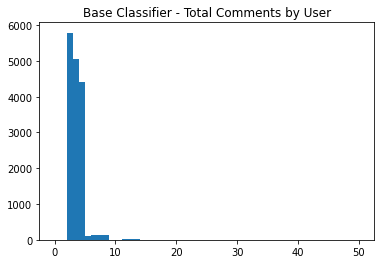

DescribeResult(nobs=15807, minmax=(0.23076923076923078, 0.75), mean=0.3730901992716379, variance=0.011219999223851189, skewness=0.2548175555472225, kurtosis=-1.473895802377183)


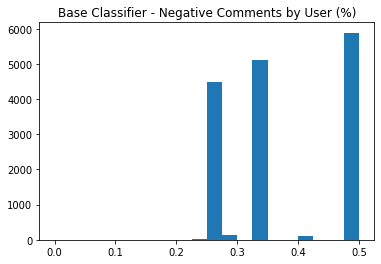

In [60]:
stuff(counts)
print("2pos")
stuff(counts[(counts['pos'] >= 2)])
print("23/2")
stuff(counts[(counts['ratio'] >= .23) & (counts['total'] >= 2)])
# print("23/2pos")
# stuff(counts[(counts['ratio'] >= .23) & (counts['pos'] >= 2)])
